# Reconnaissance d’écriture par réseaux de neurones
## Chargement de la base de données digits disponible sous sklearn

In [1]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
from sklearn import *
from sklearn.linear_model import *
from sklearn.neural_network import *
digits = load_digits()

## Affichage d'une image

<Figure size 432x288 with 0 Axes>

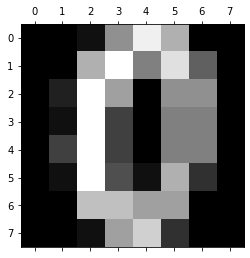

In [2]:
plt.gray()
plt.matshow(digits.images[10])
plt.show()

## Récupération des données et des labels

In [3]:
X = digits.data
y = digits.target

## Affichage du nombre d'exemples par classe

In [4]:
[print ("Il y a", digits.data[digits.target == a].shape[0], "exemples d'images de",a,"dans le dataset") for a in list(range(10))]


Il y a 178 exemples d'images de 0 dans le dataset
Il y a 182 exemples d'images de 1 dans le dataset
Il y a 177 exemples d'images de 2 dans le dataset
Il y a 183 exemples d'images de 3 dans le dataset
Il y a 181 exemples d'images de 4 dans le dataset
Il y a 182 exemples d'images de 5 dans le dataset
Il y a 181 exemples d'images de 6 dans le dataset
Il y a 179 exemples d'images de 7 dans le dataset
Il y a 174 exemples d'images de 8 dans le dataset
Il y a 180 exemples d'images de 9 dans le dataset


[None, None, None, None, None, None, None, None, None, None]

## Dimensionalité des données

In [5]:
print("les données ont", X.shape[1], "dimensions")
print("Chaque dimension correspond à un pixel, qui peut prendre les valeurs:",np.unique(X))

les données ont 64 dimensions
Chaque dimension correspond à un pixel, qui peut prendre les valeurs: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16.]


## Séparation en base d'apprentissage et base de test

In [6]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.7, test_size=0.3)

## Etude de l'influence du nombre de neurones de la couche cachée sur le résultat (attention, ce calcul prends approximativement 30 minutes d'éxécution)

In [7]:
clfArray = []
clfResults = []
for i in range (1,50):
    clfArray.append(MLPClassifier(hidden_layer_sizes=i, activation='tanh', solver='sgd', batch_size=1, alpha=1, learning_rate='adaptive', verbose=0))
    clfArray[i-1].fit(X_train,y_train)
    clfResults.append(clfArray[i-1].score(X_test,y_test))


## Influence du nombre de neurones de la couche cachée sur le taux de reconnaissance

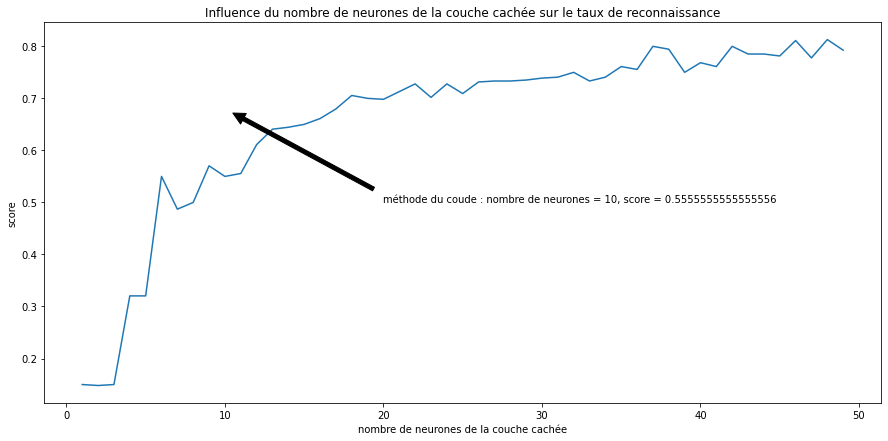

In [8]:
plt.figure(figsize=(15,7))
plt.title("Influence du nombre de neurones de la couche cachée sur le taux de reconnaissance")
plt.ylabel('score')
plt.xlabel('nombre de neurones de la couche cachée')
plt.annotate('méthode du coude : nombre de neurones = 10, score = ' + str(clfResults[10]) , xy= (10,0.68), xytext=( 20,0.5) ,arrowprops=dict(facecolor='black', shrink=0.05),)

plt.plot(list(range(1,50)),clfResults)

# Cross-validation

In [9]:
clfCV = MLPClassifier(hidden_layer_sizes=10, activation='tanh',validation_fraction=0.2, solver='sgd', batch_size=1, alpha=1, learning_rate='adaptive', verbose=0)
clfCV.fit(X_train,y_train)
clfCV.score(X_test,y_test)

0.587037037037037